In [30]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn.linear_model import Lasso

M = 12
mu = np.linspace(0, 1, M)
mu[0] = 1

def h(X):    
    return np.sin(2 * np.pi * X)

def phi(x, mu):
    return np.exp(-1000/2 * (x-mu)**2)

def generate_dataset(size):
    X = np.random.uniform(size=size)
    T = h(X) + 0.5 * np.random.normal(size = size)
    return (X,T)

def Phi(X):
    Phi = np.zeros((len(X),M))
    for i in range(len(X)):
        for j in range(M):
            Phi[i,j] = phi(X[i], mu[j])
    return Phi

In [35]:
N = 25
X,T = generate_dataset(N)
alphas, coefs, _ = lasso_path(Phi(X), T)

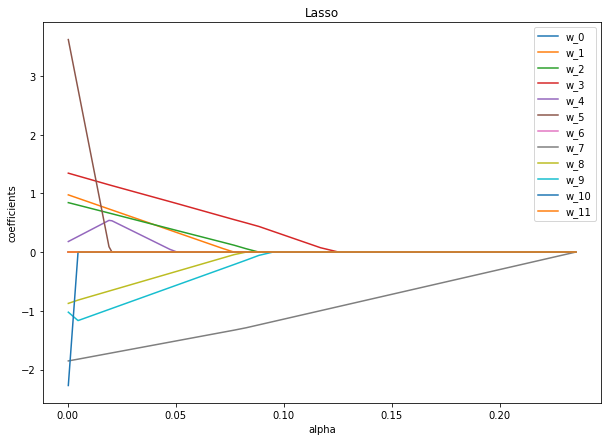

In [36]:
plt.figure(figsize=(10,7))
for i in range(len(coefs)):
    plt.plot(alphas, coefs[i], label = 'w_' + str(i))
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso')
plt.legend()
plt.show()

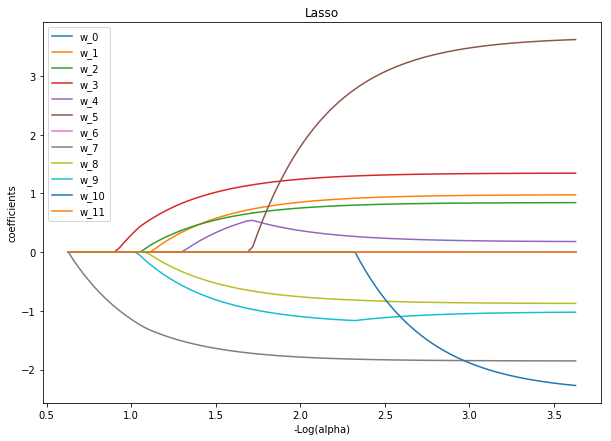

In [37]:
plt.figure(figsize=(10,7))
for i in range(len(coefs)):
    plt.plot(-np.log10(alphas), coefs[i], label = 'w_' + str(i))
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso')
plt.legend()
plt.show()

In [38]:
model = Lasso(alpha = 0.10, fit_intercept = False)
model.fit(Phi(X),T)
model.coef_

array([-0.        ,  0.        ,  0.        ,  0.29127506,  0.        ,
        0.        , -0.        , -1.14189499, -0.        , -0.        ,
       -0.        , -0.        ])